<a href="https://colab.research.google.com/github/Crismaria11/Proyecto2_DS/blob/main/Proyecto2_DS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto 2. Analisis Exploratorio

## Deteccion de covid en radiografias de torax

### Integrantes
#### Cristina Bautista 161260
#### Jose Block 18935
#### Esteban Cabrera 17781
#### Byron Mota 15246

## Investigacion

---



Se realizó una breve investigación en el análisis que se lleva a cabo a la hora de analizar una radiografía, y de los datos más importantes es que se divide en 5 tipos de colores, siendo:

negro = aire

gris oscuro = grasas...

gris claro =  tejidos blandos(órganos)...

blanco opaco = huesos...

blanco brillante = metales...

Estos cinco colores se utilizan como métrica de la radiografía. Nos dan una pista de lo que es, debido a que dependiendo de la densidad de lo que sea que salga en la radiografía, el color se irá degradando a negro o blanco brillante. Se usa como punto de medida la curvatura del diafragma, cuando esta curvatura no se puede ver con claridad, puede ser varias cosas, pulmones dañados, modificaciones debido a operaciones en el cuerpo, obesidad, como las más comunes. Generalmente cuando no se puede ver el espacio o la diferencia entre los pulmones y el diafragma, se debe a que estos no tienen la densidad que deberían de tener, o sea que hay algún tipo de hinchazón u obstáculo dentro de los pulmones que cambia el color con el que se presentan.

Por otro lado se investigó si es posible determinar si se tiene covid o no con una radiografía del tórax, y se llegó a la conclusión que no se puede, lo único que ayuda a ver la radiografía es a ver la salud de los pulmones como el tejido blando que son, no aplica para los asintomáticos y solo nos ayuda a ver qué tan crítica es la condición de los pulmones, que al final es un dato se suma importancia a pesar de que no pueda asegurar un negativo de covid o positivo. 

### Situación Problemática 
Debido al coronavirus, se requiere hacer pruebas para ver si se tiene o no este virus, entre estas, se realizan radiografías de tórax para ver el estado de los pulmones y los doctores a simple vista pueden dejar pasar por alto indicios de areas afectadas por Covid.

### Problema Científico
El virus de la Covid-19, se puede diagnosticar por una prueba de PCR, uno de los problemas que se tiene con estos resultados es que obtener el resultado de la misma conlleva una larga espera. Por lo que existe otro procedimiento, la toma de radiografía del tórax, el cual puede mostrar indicios si la enfermedad a afectado a los pulmones de alguan manera. Se puede entender que para la obtención de estas placas se toman un par de minutos a comparación de una prueba de PCR, además que provee más información sobre el posible estado deteriorado de un paciente y brindar tratamiento aun más especializado para este paciente. Uno de los posibles problemas que se encuentran es el de tener una placa y por medio del ojo humano no lograr ver en su totalidad pequeños indicios de infección, por lo que implementar un programa que utilice un algoritmo y una base de datos de entrenamiento que de el resultado basado en los datos y a la vez facilite la lectura de una radiografía de tórax con datos relevantes que ayuden al doctor a analizar las radiografías de manera precisa y eficiente, sería una ayuda increíble para la detección de la enfermedad. 

### Objetivos
*   Entender los filtros y criterios que tienden a diferenciar correctamente un caso positivo de uno negativo de coronavirus.

*   Lograr tener predicciones con una precisión mayor a 80%.

*   Presentar la información útil de las radiografías para facilitar la lectura de las mismas a los doctores.


### Descripción de los datos

**train_image_level.csv:**

id
*   Descripcion: 
  *   identificador de imagen.

boxes
*   Descripcion: 
  *   listado de diccionario, incluye datos de coordenadas x, y ademas de width y height

label
*   Descripcion: 
  *   Tiene dos tipos de label
    *   opacity, si se encuentra opacidad en la imagen
    *   none 10011, no se encuentra opacidad en la imagen

(opacidad diferente de los huesos que existen en el cuerpo)

StudyInstanceUID
*   Descripcion: 
  *   Identificador de estudio, el mismo id que el de la tabla de train_study_level.csv.


**train_study_level.csv:**

id

*   Tipo: 
  *   String
  *   id
*   Descripcion
  *   identificador de un estudio

Negative for Pneumonia

*   Tipo: 
  *   int
  *   Categorica
*   Descripcion
  *   0 para positiva 
  *   1 como afirmación de que sea Negativa

Typical Appearance

*   Tipo: 
  *   int
  *   Categorica
*   Descripcion
  *   0 para negativa 
  *   1 como positiva

Indeterminate Appearance

*   Tipo: 
  *   int
  *   Categorica
*   Descripcion
  *   0 para negativa 
  *   1 como positiva

Atypical Appearance

*   Tipo: 
  *   int
  *   Categorica
*   Descripcion
  *   0 para negativa 
  *   1 como positiva


### Referencias:

MedCram - Medical Lectures Explained CLEARLY. (2018, 30 diciembre). Chest X Ray Interpretation Explained Clearly - How to read a chest Xray. YouTube. https://www.youtube.com/watch?v=rEm2HkI5UDs&t=411s


Schaefer-Prokop, C., & Prokop, M. (2020, 19 noviembre). Chest Radiography in COVID-19: No Role in Asymptomatic and Oligosymptomatic Disease. Radiology. https://pubs.rsna.org/doi/full/10.1148/radiol.2020204038


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install matplotlib==3.1.3
%matplotlib inline

!pip install opencv-python
import cv2
import scipy.misc

!pip install pydicom
import pydicom as dicom
import os

!pip install tensorflow-io
import tensorflow as tf
import tensorflow_io as tfio

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Carga de datos

df1 representa al archivo 'train_image_level.csv'

df2 representa al archivo 'train_stydy_level.csv'

In [3]:
df1 = pd.read_csv('/content/drive/MyDrive/Proyecto2_DS2/train_image_level.csv')
df1['id_jpg'] = df1['id']
df1['id_jpg'] = df1['id'].str.replace('_image', '.jpg')
df1['id'] = df1['id'].str.replace('_image', '')

In [4]:
df1

,id,boxes,label,StudyInstanceUID,id_jpg
0,000a312787f2,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75,000a312787f2.jpg
1,000c3a3f293f,NaN,none 1 0 0 1 1,ff0879eb20ed,000c3a3f293f.jpg
2,0012ff7358bc,"[{'x': 677.42216, 'y': 197.97662, 'width': 867...",opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7,0012ff7358bc.jpg
3,001398f4ff4f,"[{'x': 2729, 'y': 2181.33331, 'width': 948.000...",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2,001398f4ff4f.jpg
4,001bd15d1891,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'he...",opacity 1 623.23328 1050 1337.23328 2156 opaci...,dfd9fdd85a3e,001bd15d1891.jpg
...,...,...,...,...,...
6329,ffcc6edd9445,NaN,none 1 0 0 1 1,7e6c68462e06,ffcc6edd9445.jpg
6330,ffd91a2c4ca0,NaN,none 1 0 0 1 1,8332bdaddb6e,ffd91a2c4ca0.jpg
6331,ffd9b6cf2961,"[{'x': 2197.38566, 'y': 841.07361, 'width': 31...",opacity 1 2197.38566 841.07361 2513.80265 1292...,7eed9af03814,ffd9b6cf2961.jpg
6332,ffdc682f7680,"[{'x': 2729.27083, 'y': 332.26044, 'width': 14...",opacity 1 2729.27083 332.26044 4225.52099 2936...,a0cb0b96fb3d,ffdc682f7680.jpg


In [5]:
df2 = pd.read_csv('/content/drive/MyDrive/Proyecto2_DS2/train_study_level.csv')
df2['id'] = df2['id'].str.replace('_study', '')

## Analisis Exploratorio

In [6]:
df1.head()

,id,boxes,label,StudyInstanceUID,id_jpg
0,000a312787f2,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75,000a312787f2.jpg
1,000c3a3f293f,NaN,none 1 0 0 1 1,ff0879eb20ed,000c3a3f293f.jpg
2,0012ff7358bc,"[{'x': 677.42216, 'y': 197.97662, 'width': 867...",opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7,0012ff7358bc.jpg
3,001398f4ff4f,"[{'x': 2729, 'y': 2181.33331, 'width': 948.000...",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2,001398f4ff4f.jpg
4,001bd15d1891,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'he...",opacity 1 623.23328 1050 1337.23328 2156 opaci...,dfd9fdd85a3e,001bd15d1891.jpg


##### Hallazgo
Se realizo una inspeccion de elementos dentro de boxes, para ver si es una lista que contiene un diccionario singular o si puede contener multiples diccionarios o bounding boxes

In [7]:
df1['boxes'][0]

"[{'x': 789.28836, 'y': 582.43035, 'width': 1026.65662, 'height': 1917.30292}, {'x': 2245.91208, 'y': 591.20528, 'width': 1094.66162, 'height': 1761.54944}]"

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6334 entries, 0 to 6333
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                6334 non-null   object
 1   boxes             4294 non-null   object
 2   label             6334 non-null   object
 3   StudyInstanceUID  6334 non-null   object
 4   id_jpg            6334 non-null   object
dtypes: object(5)
memory usage: 247.5+ KB


In [9]:
df2.head()

,id,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance
0,00086460a852,0,1,0,0
1,000c9c05fd14,0,0,0,1
2,00292f8c37bd,1,0,0,0
3,005057b3f880,1,0,0,0
4,0051d9b12e72,0,0,0,1


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6054 entries, 0 to 6053
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        6054 non-null   object
 1   Negative for Pneumonia    6054 non-null   int64 
 2   Typical Appearance        6054 non-null   int64 
 3   Indeterminate Appearance  6054 non-null   int64 
 4   Atypical Appearance       6054 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 236.6+ KB


##### **Hallazgo** 

El StudyInstanceUID del DataFrame df1 es compatible con el id del DataFrame df2, por lo que se puede hacer merge, para unir ambos DataFrames en uno solo.

In [11]:
df = pd.merge(df1, df2, left_on='StudyInstanceUID', right_on='id', how='inner')

In [12]:
df.head()

,id_x,boxes,label,StudyInstanceUID,id_jpg,id_y,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance
0,000a312787f2,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75,000a312787f2.jpg,5776db0cec75,0,1,0,0
1,000c3a3f293f,NaN,none 1 0 0 1 1,ff0879eb20ed,000c3a3f293f.jpg,ff0879eb20ed,1,0,0,0
2,0012ff7358bc,"[{'x': 677.42216, 'y': 197.97662, 'width': 867...",opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7,0012ff7358bc.jpg,9d514ce429a7,0,1,0,0
3,001398f4ff4f,"[{'x': 2729, 'y': 2181.33331, 'width': 948.000...",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2,001398f4ff4f.jpg,28dddc8559b2,0,0,0,1
4,001bd15d1891,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'he...",opacity 1 623.23328 1050 1337.23328 2156 opaci...,dfd9fdd85a3e,001bd15d1891.jpg,dfd9fdd85a3e,0,1,0,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6334 entries, 0 to 6333
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id_x                      6334 non-null   object
 1   boxes                     4294 non-null   object
 2   label                     6334 non-null   object
 3   StudyInstanceUID          6334 non-null   object
 4   id_jpg                    6334 non-null   object
 5   id_y                      6334 non-null   object
 6   Negative for Pneumonia    6334 non-null   int64 
 7   Typical Appearance        6334 non-null   int64 
 8   Indeterminate Appearance  6334 non-null   int64 
 9   Atypical Appearance       6334 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 544.3+ KB


In [14]:
duplicate = df[df.duplicated('StudyInstanceUID')]
duplicate

,id_x,boxes,label,StudyInstanceUID,id_jpg,id_y,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance
23,cada5310214b,"[{'x': 981.75034, 'y': 256.08181, 'width': 225...",opacity 1 981.75034 256.08181 1207.54099 765.2...,1a58b43cf286,cada5310214b.jpg,1a58b43cf286,0,1,0,0
26,0d4d6acc9ed3,NaN,none 1 0 0 1 1,74ba8f2badcb,0d4d6acc9ed3.jpg,74ba8f2badcb,1,0,0,0
27,93a881fb3292,NaN,none 1 0 0 1 1,74ba8f2badcb,93a881fb3292.jpg,74ba8f2badcb,1,0,0,0
28,cdd9e3aaf45a,NaN,none 1 0 0 1 1,74ba8f2badcb,cdd9e3aaf45a.jpg,74ba8f2badcb,1,0,0,0
32,b3ffe59e37c7,NaN,none 1 0 0 1 1,81f6b4b343f7,b3ffe59e37c7.jpg,81f6b4b343f7,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
5143,d4600028f75c,"[{'x': 399.19174, 'y': 226.69307, 'width': 827...",opacity 1 399.19174 226.69307 1226.20168999999...,8b18f1963aff,d4600028f75c.jpg,8b18f1963aff,0,1,0,0
5166,df3d32c8df06,NaN,none 1 0 0 1 1,b40f174f19a6,df3d32c8df06.jpg,b40f174f19a6,0,0,1,0
5314,f4847d161683,"[{'x': 702.27444, 'y': 610.99231, 'width': 786...",opacity 1 702.27444 610.99231 1488.39055 1746....,6f6cf201e2e9,f4847d161683.jpg,6f6cf201e2e9,0,1,0,0
5603,dfd9078a4c6d,NaN,none 1 0 0 1 1,f5c94b5db0cd,dfd9078a4c6d.jpg,f5c94b5db0cd,0,1,0,0


In [15]:
duplicate2 = df[df.duplicated('id_y')]
duplicate2

,id_x,boxes,label,StudyInstanceUID,id_jpg,id_y,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance
23,cada5310214b,"[{'x': 981.75034, 'y': 256.08181, 'width': 225...",opacity 1 981.75034 256.08181 1207.54099 765.2...,1a58b43cf286,cada5310214b.jpg,1a58b43cf286,0,1,0,0
26,0d4d6acc9ed3,NaN,none 1 0 0 1 1,74ba8f2badcb,0d4d6acc9ed3.jpg,74ba8f2badcb,1,0,0,0
27,93a881fb3292,NaN,none 1 0 0 1 1,74ba8f2badcb,93a881fb3292.jpg,74ba8f2badcb,1,0,0,0
28,cdd9e3aaf45a,NaN,none 1 0 0 1 1,74ba8f2badcb,cdd9e3aaf45a.jpg,74ba8f2badcb,1,0,0,0
32,b3ffe59e37c7,NaN,none 1 0 0 1 1,81f6b4b343f7,b3ffe59e37c7.jpg,81f6b4b343f7,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
5143,d4600028f75c,"[{'x': 399.19174, 'y': 226.69307, 'width': 827...",opacity 1 399.19174 226.69307 1226.20168999999...,8b18f1963aff,d4600028f75c.jpg,8b18f1963aff,0,1,0,0
5166,df3d32c8df06,NaN,none 1 0 0 1 1,b40f174f19a6,df3d32c8df06.jpg,b40f174f19a6,0,0,1,0
5314,f4847d161683,"[{'x': 702.27444, 'y': 610.99231, 'width': 786...",opacity 1 702.27444 610.99231 1488.39055 1746....,6f6cf201e2e9,f4847d161683.jpg,6f6cf201e2e9,0,1,0,0
5603,dfd9078a4c6d,NaN,none 1 0 0 1 1,f5c94b5db0cd,dfd9078a4c6d.jpg,f5c94b5db0cd,0,1,0,0


##### Hallazgo

Para un mismo estudio (StudyInstanceUID/id_y) pueden incluirse multiples distintas imagenes (id_x)

In [16]:
df[df.eq('74ba8f2badcb').any(1)]

,id_x,boxes,label,StudyInstanceUID,id_jpg,id_y,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance
25,00e3a7e91a34,NaN,none 1 0 0 1 1,74ba8f2badcb,00e3a7e91a34.jpg,74ba8f2badcb,1,0,0,0
26,0d4d6acc9ed3,NaN,none 1 0 0 1 1,74ba8f2badcb,0d4d6acc9ed3.jpg,74ba8f2badcb,1,0,0,0
27,93a881fb3292,NaN,none 1 0 0 1 1,74ba8f2badcb,93a881fb3292.jpg,74ba8f2badcb,1,0,0,0
28,cdd9e3aaf45a,NaN,none 1 0 0 1 1,74ba8f2badcb,cdd9e3aaf45a.jpg,74ba8f2badcb,1,0,0,0


##### Hallazgo

Por la tabla y la gráfica se puede ver que el dataset no es uniforme ya que las muestras no son 50% con label de opacity y 50% con label de none 10011, en realidad las 2/3 del dataset son de label opacity y 1/3 es de label none 10011

In [17]:
dfLabel = df.loc[df['label'] == 'none 1 0 0 1 1']
dfLabelShape = dfLabel.shape[0]
dfShape = df.shape[0]
dfShape = dfShape - dfLabelShape
dfProportion = pd.DataFrame({
    'Labels' : ['Opacity', 'None'],
    'Contador' : [dfShape, dfLabelShape],
    'Proporcion' : [(100*dfShape/df.shape[0]), (100*dfLabelShape/df.shape[0])],
},
index=['Opacity', 'None'])
dfProportion

,Labels,Contador,Proporcion
Opacity,Opacity,4294,67.792864
None,None,2040,32.207136


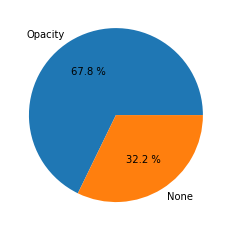

In [18]:
plt.pie(dfProportion.Contador, labels=dfProportion.Labels, autopct="%0.1f %%")
plt.show()

#### Dataset Completo Proporciones

In [19]:
colNegPneu = df['Negative for Pneumonia'].value_counts()
colTypApp = df['Typical Appearance'].value_counts()
colIntApp = df['Indeterminate Appearance'].value_counts()
colAtyApp = df['Atypical Appearance'].value_counts()

In [20]:
proportionsComplete = {
    'Nombres de Columnas' : ['Negative for Pneumonia', 'Negative for Pneumonia', 'Typical Appearance', 'Typical Appearance', 
                             'Indeterminate Appearance', 'Indeterminate Appearance', 'Atypical Appearance', 'Atypical Appearance'],
    'Metricas' : [0,1,0,1,0,1,0,1],
    'Contador' : [],
    'Proporciones' : []
}

In [21]:
listColumns = [colNegPneu, colTypApp, colIntApp, colAtyApp]
listColumnsNames = ['Negative for Pneumonia', 'Typical Appearance', 'Indeterminate Appearance', 'Atypical Appearance']
listCounter = []
listProportions = []
for i in range(len(listColumnsNames)):
    a = (100*listColumns[i][0])/sum(listColumns[i])
    listCounter.append(listColumns[i][0])
    print("La proporcion de 0's en ", listColumnsNames[i], "es: \t", a)
    listProportions.append(a)
    b = (100*listColumns[i][1])/sum(listColumns[i])
    listCounter.append(listColumns[i][1])
    print("La proporcion de 1's en ", listColumnsNames[i], "es: \t", b)
    listProportions.append(b)
proportionsComplete['Contador'] = listCounter
proportionsComplete['Proporciones'] = listProportions

La proporcion de 0's en  Negative for Pneumonia es: 	 72.5923586990843
La proporcion de 1's en  Negative for Pneumonia es: 	 27.407641300915692
La proporcion de 0's en  Typical Appearance es: 	 52.526049889485314
La proporcion de 1's en  Typical Appearance es: 	 47.473950110514686
La proporcion de 0's en  Indeterminate Appearance es: 	 82.50710451531418
La proporcion de 1's en  Indeterminate Appearance es: 	 17.49289548468582
La proporcion de 0's en  Atypical Appearance es: 	 92.3744868961162
La proporcion de 1's en  Atypical Appearance es: 	 7.625513103883802


**Tabla de proporciones sobre las diferentes clases entre negativo neumonía e indices de posible Covid**

En esta tabla se muestra las proporciones de cada clase en los casos que sean positivos (1) o negativos (0)

##### Hallazgo
En lo que se demuestra que hay un total de 4598 casos de Pneumonia, por lo que el 72.59% del dataset completo tiene algun indicio de posible Covid-19

In [22]:
# Visto en tabla
proportionsComplete = pd.DataFrame(proportionsComplete)
proportionsComplete

,Nombres de Columnas,Metricas,Contador,Proporciones
0,Negative for Pneumonia,0,4598,72.592359
1,Negative for Pneumonia,1,1736,27.407641
2,Typical Appearance,0,3327,52.526050
3,Typical Appearance,1,3007,47.473950
4,Indeterminate Appearance,0,5226,82.507105
5,Indeterminate Appearance,1,1108,17.492895
6,Atypical Appearance,0,5851,92.374487
7,Atypical Appearance,1,483,7.625513


**Gráficas de barra de frecuencia de 'Negative for Pneumonia'**

Como se puede observar en esta gráfica existen 4598 casos en las que no se cumple la clase y 1736 en los que sí.

AttributeError: ignored

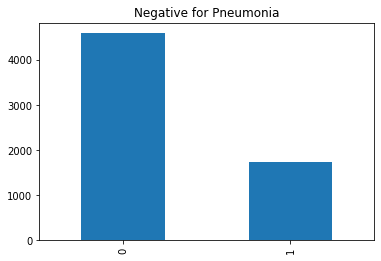

In [24]:
ax = colNegPneu.plot.bar()
ax.set_title(listColumnsNames[0])
ax.bar_label(ax.containers[0]),

**Gráficas de barra de frecuencia de 'Typical Appearance'**

Como se puede observar en esta gráfica existen 3327 casos en las que no se cumple la clase y 3007 en los que sí.


AttributeError: ignored

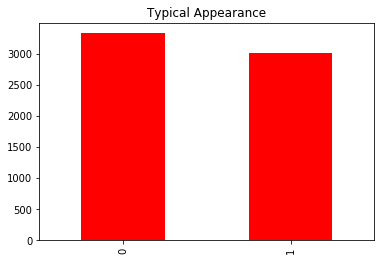

In [25]:
ax = colTypApp.plot.bar(color='red')
ax.set_title(listColumnsNames[1])
ax.bar_label(ax.containers[0])

**Gráficas de barra de frecuencia de 'Indeterminate Appearance'**

Como se puede observar en esta gráfica existen 5226 casos en las que no se cumple la clase y 1108 en los que sí.

AttributeError: ignored

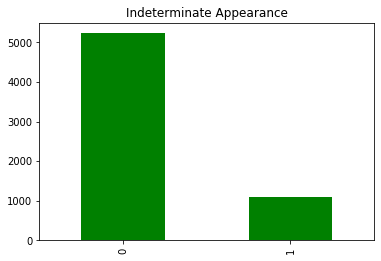

In [26]:
ax = colIntApp.plot.bar(color='green')
ax.set_title(listColumnsNames[2])
ax.bar_label(ax.containers[0])

**Gráficas de barra de frecuencia de 'Atypical Appearance'**

Como se puede observar en esta gráfica existen 5851 casos en las que no se cumple la clase y 483 en los que sí.

In [ ]:
ax = colAtyApp.plot.bar(color='orange')
ax.set_title(listColumnsNames[3])
ax.bar_label(ax.containers[0])

**Gráfica de pie sobre las diferentes clases entre negativo neumonía e indices de posible Covid (dataset completo)**

Como se puede observar, la clase 'typical appearance' predomina ante todas. Por consiguiente, la otra clase más común es la 'negative for pneumonia'. Luego le sigue la clase 'indeterminate appearance'. Finalmente, la menos comun es 'atypical appearance'. Podemos inferir que los titulos de las clases van acorde a su porcentaje precentado.

([<matplotlib.patches.Wedge at 0x7f51ac4ea090>,
 [Text(0.7168168491529645, 0.8343701844927204, 'Negative for Pneumonia'),
  Text(-1.0971564952719262, -0.07904191851558096, 'Typical Appearance'),
  Text(0.5675442945704217, -0.9422809950861593, 'Indeterminate Appearance'),
  Text(1.068586002736162, -0.26100566039140105, 'Atypical Appearance')])

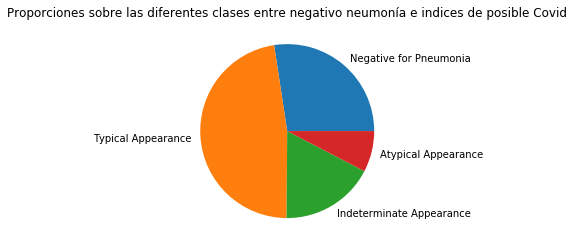

In [27]:
count_values = [colNegPneu[1], colTypApp[1], colIntApp[1], colAtyApp[1]]
labels_values = ['Negative for Pneumonia', 'Typical Appearance', 'Indeterminate Appearance', 'Atypical Appearance']

plt.axis('equal')
plt.title('Proporciones sobre las diferentes clases entre negativo neumonía e indices de posible Covid')
plt.pie(count_values, labels=labels_values)

#### Dataset filtrado por none 10011 Proporciones

In [28]:
df1.loc[df1['label'] == 'none 1 0 0 1 1']

,id,boxes,label,StudyInstanceUID,id_jpg
1,000c3a3f293f,NaN,none 1 0 0 1 1,ff0879eb20ed,000c3a3f293f.jpg
6,0023f02ae886,NaN,none 1 0 0 1 1,2fa400b873f5,0023f02ae886.jpg
22,00c1515729a8,NaN,none 1 0 0 1 1,1a58b43cf286,00c1515729a8.jpg
24,00e3a7e91a34,NaN,none 1 0 0 1 1,74ba8f2badcb,00e3a7e91a34.jpg
26,010214f9b600,NaN,none 1 0 0 1 1,2a7b4e669dda,010214f9b600.jpg
...,...,...,...,...,...
6322,ff7659762b75,NaN,none 1 0 0 1 1,4aa11ef1fd38,ff7659762b75.jpg
6324,ff9f10a24c27,NaN,none 1 0 0 1 1,a937614104e3,ff9f10a24c27.jpg
6325,ffa9fef3c7bf,NaN,none 1 0 0 1 1,5133bbb7b75c,ffa9fef3c7bf.jpg
6329,ffcc6edd9445,NaN,none 1 0 0 1 1,7e6c68462e06,ffcc6edd9445.jpg


In [29]:
dfLabel

,id_x,boxes,label,StudyInstanceUID,id_jpg,id_y,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance
1,000c3a3f293f,NaN,none 1 0 0 1 1,ff0879eb20ed,000c3a3f293f.jpg,ff0879eb20ed,1,0,0,0
6,0023f02ae886,NaN,none 1 0 0 1 1,2fa400b873f5,0023f02ae886.jpg,2fa400b873f5,1,0,0,0
22,00c1515729a8,NaN,none 1 0 0 1 1,1a58b43cf286,00c1515729a8.jpg,1a58b43cf286,0,1,0,0
25,00e3a7e91a34,NaN,none 1 0 0 1 1,74ba8f2badcb,00e3a7e91a34.jpg,74ba8f2badcb,1,0,0,0
26,0d4d6acc9ed3,NaN,none 1 0 0 1 1,74ba8f2badcb,0d4d6acc9ed3.jpg,74ba8f2badcb,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
6322,ff7659762b75,NaN,none 1 0 0 1 1,4aa11ef1fd38,ff7659762b75.jpg,4aa11ef1fd38,1,0,0,0
6324,ff9f10a24c27,NaN,none 1 0 0 1 1,a937614104e3,ff9f10a24c27.jpg,a937614104e3,1,0,0,0
6325,ffa9fef3c7bf,NaN,none 1 0 0 1 1,5133bbb7b75c,ffa9fef3c7bf.jpg,5133bbb7b75c,1,0,0,0
6329,ffcc6edd9445,NaN,none 1 0 0 1 1,7e6c68462e06,ffcc6edd9445.jpg,7e6c68462e06,1,0,0,0


In [30]:
colNegPneuLabel = dfLabel['Negative for Pneumonia'].value_counts()
colTypAppLabel = dfLabel['Typical Appearance'].value_counts()
colIntAppLabel = dfLabel['Indeterminate Appearance'].value_counts()
colAtyAppLabel = dfLabel['Atypical Appearance'].value_counts()

In [31]:
proportionsCompleteNone = {
    'Nombres de Columnas' : ['Negative for Pneumonia', 'Negative for Pneumonia', 'Typical Appearance', 'Typical Appearance', 
                             'Indeterminate Appearance', 'Indeterminate Appearance', 'Atypical Appearance', 'Atypical Appearance'],
    'Metricas' : [0,1,0,1,0,1,0,1],
    'Contador' : [],
    'Proporciones' : []
}

In [32]:
listColumns = [colNegPneuLabel, colTypAppLabel, colIntAppLabel, colAtyAppLabel]
listColumnsNames = ['Negative for Pneumonia', 'Typical Appearance', 'Indeterminate Appearance', 'Atypical Appearance']
listCounter = []
listProportions = []
for i in range(len(listColumnsNames)):
    a = (100*listColumns[i][0])/sum(listColumns[i])
    listCounter.append(listColumns[i][0])
    print("La proporcion de 0's en ", listColumnsNames[i], "es: \t", a)
    listProportions.append(a)
    b = (100*listColumns[i][1])/sum(listColumns[i])
    listCounter.append(listColumns[i][1])
    print("La proporcion de 1's en ", listColumnsNames[i], "es: \t", b)
    listProportions.append(b)
proportionsCompleteNone['Contador'] = listCounter
proportionsCompleteNone['Proporciones'] = listProportions

La proporcion de 0's en  Negative for Pneumonia es: 	 14.901960784313726
La proporcion de 1's en  Negative for Pneumonia es: 	 85.09803921568627
La proporcion de 0's en  Typical Appearance es: 	 92.5
La proporcion de 1's en  Typical Appearance es: 	 7.5
La proporcion de 0's en  Indeterminate Appearance es: 	 97.1078431372549
La proporcion de 1's en  Indeterminate Appearance es: 	 2.892156862745098
La proporcion de 0's en  Atypical Appearance es: 	 95.49019607843137
La proporcion de 1's en  Atypical Appearance es: 	 4.509803921568627


**Tabla de proporciones sobre las diferentes clases entre negativo neumonía e indices de posible Covid**


En esta tabla se muestra las proporciones de cada clase en los casos que sean positivos (1) o negativos (0)

##### Hallazgo
Dentro del filtro de label = none 10011, se encontro que el 304 casos que equivalen al 14.90% del filtro si tienen Pneumonia y algun indicio de posible Covid-19

In [33]:

# Visto en tabla
proportionsCompleteNone = pd.DataFrame(proportionsCompleteNone)
proportionsCompleteNone

,Nombres de Columnas,Metricas,Contador,Proporciones
0,Negative for Pneumonia,0,304,14.901961
1,Negative for Pneumonia,1,1736,85.098039
2,Typical Appearance,0,1887,92.500000
3,Typical Appearance,1,153,7.500000
4,Indeterminate Appearance,0,1981,97.107843
5,Indeterminate Appearance,1,59,2.892157
6,Atypical Appearance,0,1948,95.490196
7,Atypical Appearance,1,92,4.509804


**Gráficas de barra de frecuencia de 'Negative for Pneumonia'**

Como se puede observar en esta gráfica existen 1736 casos en las que no se cumple la clase y 304 en los que sí.

AttributeError: ignored

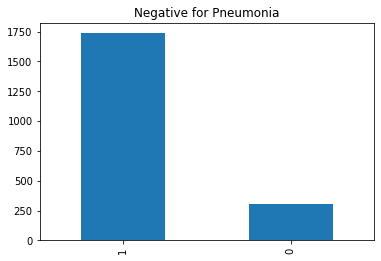

In [34]:
ax = colNegPneuLabel.plot.bar()
ax.set_title(listColumnsNames[0])
ax.bar_label(ax.containers[0])

**Gráficas de barra de frecuencia de 'Typical Appearance'**

Como se puede observar en esta gráfica existen 1887 casos en las que no se cumple la clase y 153 en los que sí.

AttributeError: ignored

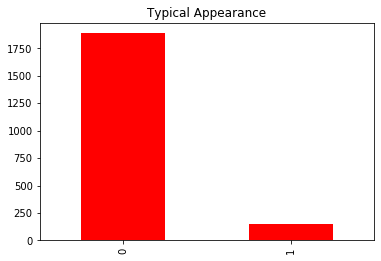

In [35]:
ax = colTypAppLabel.plot.bar(color='red')
ax.set_title(listColumnsNames[1])
ax.bar_label(ax.containers[0])


**Gráficas de barra de frecuencia de 'Indeterminate Appearance'**

Como se puede observar en esta gráfica existen 1981 casos en las que no se cumple la clase y 59 en los que sí.

AttributeError: ignored

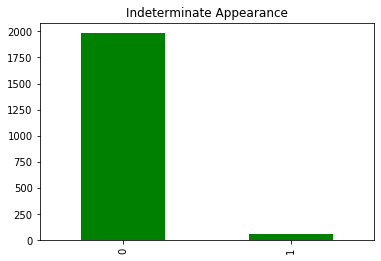

In [36]:
ax = colIntAppLabel.plot.bar(color='green')
ax.set_title(listColumnsNames[2])
ax.bar_label(ax.containers[0])

**Gráficas de barra de frecuencia de 'Atypical Appearance'**

Como se puede observar en esta gráfica existen 1948 casos en las que no se cumple la clase y 92 en los que sí.

AttributeError: ignored

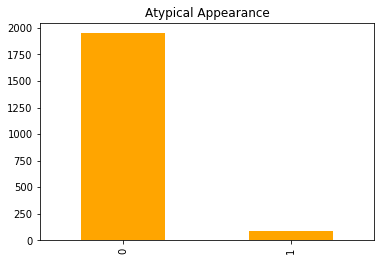

In [37]:
ax = colAtyAppLabel.plot.bar(color='orange')
ax.set_title(listColumnsNames[3])
ax.bar_label(ax.containers[0])

**Gráfica de pie sobre las diferentes clases entre negativo neumonía e indices de posible Covid (filtro de label = none 10011)**

Como se puede observar, la clase 'Negative for Pneumonia' predomina ante todas. Por consiguiente, la otra clase más común es la 'Atypical Appearance'. Luego le sigue la clase 'Indeterminate Appearance'. Finalmente, la menos comun es 'Indeterminate appearance'.

([<matplotlib.patches.Wedge at 0x7f51ac229e90>,
 [Text(-0.9816406554236289, 0.49636843535771735, 'Negative for Pneumonia'),
  Text(0.8408313606266763, -0.7092267782498716, 'Typical Appearance'),
  Text(1.0238727165540078, -0.40210031123628415, 'Indeterminate Appearance'),
  Text(1.0889782468275286, -0.1553266813411081, 'Atypical Appearance')])

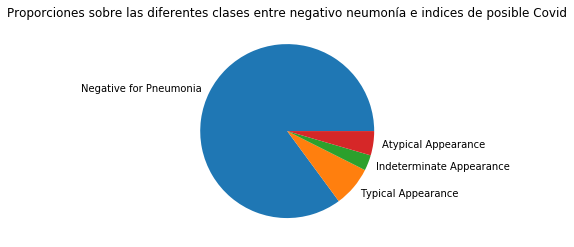

In [39]:
count_values = [colNegPneuLabel[1], colTypAppLabel[1], colIntAppLabel[1], colAtyAppLabel[1]]
labels_values = ['Negative for Pneumonia', 'Typical Appearance', 'Indeterminate Appearance', 'Atypical Appearance']
plt.title('Proporciones sobre las diferentes clases entre negativo neumonía e indices de posible Covid')
plt.axis('equal')
plt.pie(count_values, labels=labels_values)

Referencias: https://www.tensorflow.org/io/tutorials/dicom

**Despliegue de imagenes a analizar**

Despliegue de imagenes a analizar  En esta sección se despliega un conjunto de 20 imangenes del data set en las que se presentan rayos X del tórax a diferentes pacientes que cuentan con una de las diferentes clases de neumonía. Por el momento no es posible categorizarlas según la escala de grises debido a que ninguna de ellas contiene información sobre que de caso se trata. Es decir, para poder entrenar una red para separarlas en categorías, se deberían tener muestras confirmadas de casos existentes para 'Atypical Appearance', 'Indeterminate Appearance', 'Typical Appearance' y  'Negative Appearance'. Cada imagen se decodifica para encontrar la imagen sin perdida y con perdida de información, cosa que podría afectar el resultado de una red al momento de entrenarla.

In [38]:
fileNames = []
for files in os.listdir('/content/drive/MyDrive/Proyecto2_DS2/train'):
  fileNames.append(files)

In [40]:
fileNames[0:3]

['44e79d625228.jpg', '06a48d5926c9.jpg', '6a65015db6d9.jpg']

In [41]:
df.head()

,id_x,boxes,label,StudyInstanceUID,id_jpg,id_y,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance
0,000a312787f2,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75,000a312787f2.jpg,5776db0cec75,0,1,0,0
1,000c3a3f293f,NaN,none 1 0 0 1 1,ff0879eb20ed,000c3a3f293f.jpg,ff0879eb20ed,1,0,0,0
2,0012ff7358bc,"[{'x': 677.42216, 'y': 197.97662, 'width': 867...",opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7,0012ff7358bc.jpg,9d514ce429a7,0,1,0,0
3,001398f4ff4f,"[{'x': 2729, 'y': 2181.33331, 'width': 948.000...",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2,001398f4ff4f.jpg,28dddc8559b2,0,0,0,1
4,001bd15d1891,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'he...",opacity 1 623.23328 1050 1337.23328 2156 opaci...,dfd9fdd85a3e,001bd15d1891.jpg,dfd9fdd85a3e,0,1,0,0


In [42]:
from PIL import Image
from numpy import asarray
import ast
import matplotlib

In [43]:
img2 = df.loc[0, 'id_jpg']
image = Image.open('/content/drive/MyDrive/Proyecto2_DS2/train/'+img2)
data = asarray(image)
print(data)

[[196 194 192 ...   1   5  13]
 [166 158 147 ...  10   8   5]
 [ 91  82  70 ...  98 226  56]
 ...
 [  3   3   3 ...   2   2   2]
 [  3   3   3 ...   2   2   2]
 [  3   3   3 ...   2   2   2]]


In [44]:
boxes = ast.literal_eval(df.loc[0, 'boxes'])
boxes

[{'height': 1917.30292, 'width': 1026.65662, 'x': 789.28836, 'y': 582.43035},
 {'height': 1761.54944, 'width': 1094.66162, 'x': 2245.91208, 'y': 591.20528}]

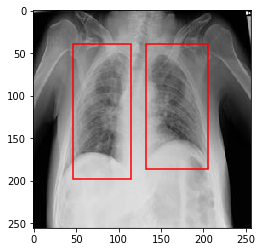

In [45]:
fig, ax = plt.subplots(1,1, figsize=(8,4))
for box in boxes:
    p = matplotlib.patches.Rectangle((box['x']/17, box['y']/15),
                                      box['width']/15, box['height']/12,
                                      ec='r', fc='none', lw=1.5)
    ax.add_patch(p)
ax.imshow(data, cmap='gray')
plt.show()

In [46]:
df

,id_x,boxes,label,StudyInstanceUID,id_jpg,id_y,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance
0,000a312787f2,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75,000a312787f2.jpg,5776db0cec75,0,1,0,0
1,000c3a3f293f,NaN,none 1 0 0 1 1,ff0879eb20ed,000c3a3f293f.jpg,ff0879eb20ed,1,0,0,0
2,0012ff7358bc,"[{'x': 677.42216, 'y': 197.97662, 'width': 867...",opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7,0012ff7358bc.jpg,9d514ce429a7,0,1,0,0
3,001398f4ff4f,"[{'x': 2729, 'y': 2181.33331, 'width': 948.000...",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2,001398f4ff4f.jpg,28dddc8559b2,0,0,0,1
4,001bd15d1891,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'he...",opacity 1 623.23328 1050 1337.23328 2156 opaci...,dfd9fdd85a3e,001bd15d1891.jpg,dfd9fdd85a3e,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
6329,ffcc6edd9445,NaN,none 1 0 0 1 1,7e6c68462e06,ffcc6edd9445.jpg,7e6c68462e06,1,0,0,0
6330,ffd91a2c4ca0,NaN,none 1 0 0 1 1,8332bdaddb6e,ffd91a2c4ca0.jpg,8332bdaddb6e,1,0,0,0
6331,ffd9b6cf2961,"[{'x': 2197.38566, 'y': 841.07361, 'width': 31...",opacity 1 2197.38566 841.07361 2513.80265 1292...,7eed9af03814,ffd9b6cf2961.jpg,7eed9af03814,0,1,0,0
6332,ffdc682f7680,"[{'x': 2729.27083, 'y': 332.26044, 'width': 14...",opacity 1 2729.27083 332.26044 4225.52099 2936...,a0cb0b96fb3d,ffdc682f7680.jpg,a0cb0b96fb3d,0,1,0,0


In [47]:
opacityCount = df['label'].str.count('opacity')
df['OpacityCount'] = opacityCount.values

In [48]:
df['Opacity'] = df.apply(lambda row : 1 if row.label.split(' ')[0]=='opacity' else 0, axis=1)
df

,id_x,boxes,label,StudyInstanceUID,id_jpg,id_y,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance,OpacityCount,Opacity
0,000a312787f2,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75,000a312787f2.jpg,5776db0cec75,0,1,0,0,2,1
1,000c3a3f293f,NaN,none 1 0 0 1 1,ff0879eb20ed,000c3a3f293f.jpg,ff0879eb20ed,1,0,0,0,0,0
2,0012ff7358bc,"[{'x': 677.42216, 'y': 197.97662, 'width': 867...",opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7,0012ff7358bc.jpg,9d514ce429a7,0,1,0,0,2,1
3,001398f4ff4f,"[{'x': 2729, 'y': 2181.33331, 'width': 948.000...",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2,001398f4ff4f.jpg,28dddc8559b2,0,0,0,1,1,1
4,001bd15d1891,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'he...",opacity 1 623.23328 1050 1337.23328 2156 opaci...,dfd9fdd85a3e,001bd15d1891.jpg,dfd9fdd85a3e,0,1,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6329,ffcc6edd9445,NaN,none 1 0 0 1 1,7e6c68462e06,ffcc6edd9445.jpg,7e6c68462e06,1,0,0,0,0,0
6330,ffd91a2c4ca0,NaN,none 1 0 0 1 1,8332bdaddb6e,ffd91a2c4ca0.jpg,8332bdaddb6e,1,0,0,0,0,0
6331,ffd9b6cf2961,"[{'x': 2197.38566, 'y': 841.07361, 'width': 31...",opacity 1 2197.38566 841.07361 2513.80265 1292...,7eed9af03814,ffd9b6cf2961.jpg,7eed9af03814,0,1,0,0,3,1
6332,ffdc682f7680,"[{'x': 2729.27083, 'y': 332.26044, 'width': 14...",opacity 1 2729.27083 332.26044 4225.52099 2936...,a0cb0b96fb3d,ffdc682f7680.jpg,a0cb0b96fb3d,0,1,0,0,2,1


In [49]:
metacsv = pd.read_csv('/content/drive/MyDrive/Proyecto2_DS2/meta.csv')
metacsv.head()

,image_id,dim0,dim1,split
0,a29c5a68b07b,2320,2828,test
1,9850b5470fd6,2330,2382,test
2,8d6dea06a032,2422,3344,test
3,dfc5c09a50bc,1140,1387,test
4,7230234e120a,2318,2383,test


In [50]:
metacsv.split.unique()

array(['test', 'train'], dtype=object)

In [51]:
trainMetacsv = metacsv.loc[metacsv.split=='train']
trainMetacsv

,image_id,dim0,dim1,split
1263,d8ba599611e5,2336,2836,train
1264,29b23a11d1e4,3488,4256,train
1265,8174f49500a5,2330,2846,train
1266,d54f6204b044,2330,2846,train
1267,d51cadde8626,3488,4256,train
...,...,...,...,...
7592,729eca7b4c1c,2539,3050,train
7593,39d52f244db3,2320,2832,train
7594,d342f75ccb55,2320,2832,train
7595,0f0b5a304a47,2320,2832,train


In [52]:
trainMetacsv.drop('split',axis=1,inplace=True)
trainMetacsv.columns = ['image_id', 'img_height', 'img_width']

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [53]:
trainMetacsv

,image_id,img_height,img_width
1263,d8ba599611e5,2336,2836
1264,29b23a11d1e4,3488,4256
1265,8174f49500a5,2330,2846
1266,d54f6204b044,2330,2846
1267,d51cadde8626,3488,4256
...,...,...,...
7592,729eca7b4c1c,2539,3050
7593,39d52f244db3,2320,2832
7594,d342f75ccb55,2320,2832
7595,0f0b5a304a47,2320,2832


In [54]:
df

,id_x,boxes,label,StudyInstanceUID,id_jpg,id_y,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance,OpacityCount,Opacity
0,000a312787f2,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75,000a312787f2.jpg,5776db0cec75,0,1,0,0,2,1
1,000c3a3f293f,NaN,none 1 0 0 1 1,ff0879eb20ed,000c3a3f293f.jpg,ff0879eb20ed,1,0,0,0,0,0
2,0012ff7358bc,"[{'x': 677.42216, 'y': 197.97662, 'width': 867...",opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7,0012ff7358bc.jpg,9d514ce429a7,0,1,0,0,2,1
3,001398f4ff4f,"[{'x': 2729, 'y': 2181.33331, 'width': 948.000...",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2,001398f4ff4f.jpg,28dddc8559b2,0,0,0,1,1,1
4,001bd15d1891,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'he...",opacity 1 623.23328 1050 1337.23328 2156 opaci...,dfd9fdd85a3e,001bd15d1891.jpg,dfd9fdd85a3e,0,1,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6329,ffcc6edd9445,NaN,none 1 0 0 1 1,7e6c68462e06,ffcc6edd9445.jpg,7e6c68462e06,1,0,0,0,0,0
6330,ffd91a2c4ca0,NaN,none 1 0 0 1 1,8332bdaddb6e,ffd91a2c4ca0.jpg,8332bdaddb6e,1,0,0,0,0,0
6331,ffd9b6cf2961,"[{'x': 2197.38566, 'y': 841.07361, 'width': 31...",opacity 1 2197.38566 841.07361 2513.80265 1292...,7eed9af03814,ffd9b6cf2961.jpg,7eed9af03814,0,1,0,0,3,1
6332,ffdc682f7680,"[{'x': 2729.27083, 'y': 332.26044, 'width': 14...",opacity 1 2729.27083 332.26044 4225.52099 2936...,a0cb0b96fb3d,ffdc682f7680.jpg,a0cb0b96fb3d,0,1,0,0,2,1


In [55]:
df = pd.merge(df, trainMetacsv, left_on='id_x', right_on='image_id')

In [56]:
df

,id_x,boxes,label,StudyInstanceUID,id_jpg,id_y,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance,OpacityCount,Opacity,image_id,img_height,img_width
0,000a312787f2,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75,000a312787f2.jpg,5776db0cec75,0,1,0,0,2,1,000a312787f2,3488,4256
1,000c3a3f293f,NaN,none 1 0 0 1 1,ff0879eb20ed,000c3a3f293f.jpg,ff0879eb20ed,1,0,0,0,0,0,000c3a3f293f,2320,2832
2,0012ff7358bc,"[{'x': 677.42216, 'y': 197.97662, 'width': 867...",opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7,0012ff7358bc.jpg,9d514ce429a7,0,1,0,0,2,1,0012ff7358bc,2544,3056
3,001398f4ff4f,"[{'x': 2729, 'y': 2181.33331, 'width': 948.000...",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2,001398f4ff4f.jpg,28dddc8559b2,0,0,0,1,1,1,001398f4ff4f,3520,4280
4,001bd15d1891,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'he...",opacity 1 623.23328 1050 1337.23328 2156 opaci...,dfd9fdd85a3e,001bd15d1891.jpg,dfd9fdd85a3e,0,1,0,0,2,1,001bd15d1891,2800,3408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6329,ffcc6edd9445,NaN,none 1 0 0 1 1,7e6c68462e06,ffcc6edd9445.jpg,7e6c68462e06,1,0,0,0,0,0,ffcc6edd9445,4240,3480
6330,ffd91a2c4ca0,NaN,none 1 0 0 1 1,8332bdaddb6e,ffd91a2c4ca0.jpg,8332bdaddb6e,1,0,0,0,0,0,ffd91a2c4ca0,2800,3408
6331,ffd9b6cf2961,"[{'x': 2197.38566, 'y': 841.07361, 'width': 31...",opacity 1 2197.38566 841.07361 2513.80265 1292...,7eed9af03814,ffd9b6cf2961.jpg,7eed9af03814,0,1,0,0,3,1,ffd9b6cf2961,2388,3050
6332,ffdc682f7680,"[{'x': 2729.27083, 'y': 332.26044, 'width': 14...",opacity 1 2729.27083 332.26044 4225.52099 2936...,a0cb0b96fb3d,ffdc682f7680.jpg,a0cb0b96fb3d,0,1,0,0,2,1,ffdc682f7680,3488,4256


In [57]:
train_imgs_path = list(df['id_x'].apply(lambda x : '/content/drive/MyDrive/Proyecto2_DS2/train/' + x + '.jpg').values)
train_imgs_path[0:5]

['/content/drive/MyDrive/Proyecto2_DS2/train/000a312787f2.jpg',
 '/content/drive/MyDrive/Proyecto2_DS2/train/000c3a3f293f.jpg',
 '/content/drive/MyDrive/Proyecto2_DS2/train/0012ff7358bc.jpg',
 '/content/drive/MyDrive/Proyecto2_DS2/train/001398f4ff4f.jpg',
 '/content/drive/MyDrive/Proyecto2_DS2/train/001bd15d1891.jpg']

(256, 256)


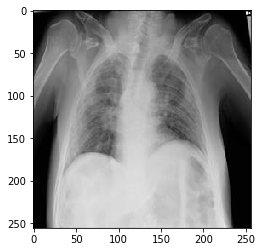

In [58]:
img = plt.imread(train_imgs_path[0])
print(img.shape)
plt.imshow(img, cmap='gray');

In [59]:
i = 0
train_imgs = []
for img_path in train_imgs_path:
    img = plt.imread(img_path)
    train_imgs.append(img)
    i += 1
    print(i)

Streaming output truncated to the last 5000 lines.
1335
1336
1337
1338
1339
1340
1341
1342
1343
1344
1345
1346
1347
1348
1349
1350
1351
1352
1353
1354
1355
1356
1357
1358
1359
1360
1361
1362
1363
1364
1365
1366
1367
1368
1369
1370
1371
1372
1373
1374
1375
1376
1377
1378
1379
1380
1381
1382
1383
1384
1385
1386
1387
1388
1389
1390
1391
1392
1393
1394
1395
1396
1397
1398
1399
1400
1401
1402
1403
1404
1405
1406
1407
1408
1409
1410
1411
1412
1413
1414
1415
1416
1417
1418
1419
1420
1421
1422
1423
1424
1425
1426
1427
1428
1429
1430
1431
1432
1433
1434
1435
1436
1437
1438
1439
1440
1441
1442
1443
1444
1445
1446
1447
1448
1449
1450
1451
1452
1453
1454
1455
1456
1457
1458
1459
1460
1461
1462
1463
1464
1465
1466
1467
1468
1469
1470
1471
1472
1473
1474
1475
1476
1477
1478
1479
1480
1481
1482
1483
1484
1485
1486
1487
1488
1489
1490
1491
1492
1493
1494
1495
1496
1497
1498
1499
1500
1501
1502
1503
1504
1505
1506
1507
1508
1509
1510
1511
1512
1513
1514
1515
1516
1517
1518
1519
1520
1521
1522
1523
1524

In [60]:
train_imgs = np.array(train_imgs)
train_imgs.shape

(6334, 256, 256)

In [61]:
train_imgs_4dim = train_imgs[:,:,:,np.newaxis]
train_imgs_4dim.shape

(6334, 256, 256, 1)

In [62]:
min(train_imgs[0].reshape(-1)), max(train_imgs[0].reshape(-1))

(0, 255)

In [63]:
min(train_imgs[13].reshape(-1)), max(train_imgs[13].reshape(-1))

(0, 255)

In [64]:
df['height_ratio'] = df['img_height'].apply(lambda x : 255/x)
df['height_ratio']

0       0.073108
1       0.109914
2       0.100236
3       0.072443
4       0.091071
          ...   
6329    0.060142
6330    0.091071
6331    0.106784
6332    0.073108
6333    0.223684
Name: height_ratio, Length: 6334, dtype: float64

In [65]:
df['width_ratio'] = df['img_width'].apply(lambda x : 255/x)
df['width_ratio']

0       0.059915
1       0.090042
2       0.083442
3       0.059579
4       0.074824
          ...   
6329    0.073276
6330    0.074824
6331    0.083607
6332    0.059915
6333    0.183850
Name: width_ratio, Length: 6334, dtype: float64

In [66]:
types = list(df.columns[6:10])
types

['Negative for Pneumonia',
 'Typical Appearance',
 'Indeterminate Appearance',
 'Atypical Appearance']

In [67]:
df.head()

,id_x,boxes,label,StudyInstanceUID,id_jpg,id_y,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance,OpacityCount,Opacity,image_id,img_height,img_width,height_ratio,width_ratio
0,000a312787f2,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75,000a312787f2.jpg,5776db0cec75,0,1,0,0,2,1,000a312787f2,3488,4256,0.073108,0.059915
1,000c3a3f293f,NaN,none 1 0 0 1 1,ff0879eb20ed,000c3a3f293f.jpg,ff0879eb20ed,1,0,0,0,0,0,000c3a3f293f,2320,2832,0.109914,0.090042
2,0012ff7358bc,"[{'x': 677.42216, 'y': 197.97662, 'width': 867...",opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7,0012ff7358bc.jpg,9d514ce429a7,0,1,0,0,2,1,0012ff7358bc,2544,3056,0.100236,0.083442
3,001398f4ff4f,"[{'x': 2729, 'y': 2181.33331, 'width': 948.000...",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2,001398f4ff4f.jpg,28dddc8559b2,0,0,0,1,1,1,001398f4ff4f,3520,4280,0.072443,0.059579
4,001bd15d1891,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'he...",opacity 1 623.23328 1050 1337.23328 2156 opaci...,dfd9fdd85a3e,001bd15d1891.jpg,dfd9fdd85a3e,0,1,0,0,2,1,001bd15d1891,2800,3408,0.091071,0.074824


In [68]:
imgs_NegPeu = list(df[df[types[0]]==1].index)
for idx in imgs_NegPeu:
    plt.imsave('/content/drive/MyDrive/Proyecto2_DS2/genData/NegPeu/{}.jpg'.format(df.loc[idx,'id_x']), train_imgs[idx], cmap='gray')

In [69]:
imgs_Typical = list(df[df[types[1]]==1].index)
for idx in imgs_Typical:
    plt.imsave('/content/drive/MyDrive/Proyecto2_DS2/genData/Typical/{}.jpg'.format(df.loc[idx,'id_x']), train_imgs[idx], cmap='gray')

In [70]:
imgs_Indeterminate = list(df[df[types[2]]==1].index)
for idx in imgs_Indeterminate:
    plt.imsave('/content/drive/MyDrive/Proyecto2_DS2/genData/Indeterminate/{}.jpg'.format(df.loc[idx,'id_x']), train_imgs[idx], cmap='gray')

In [71]:
imgs_Atypical = list(df[df[types[3]]==1].index)
for idx in imgs_Atypical:
    plt.imsave('/content/drive/MyDrive/Proyecto2_DS2/genData/Atypical/{}.jpg'.format(df.loc[idx,'id_x']), train_imgs[idx], cmap='gray')

Se uso de guia el siguiente repo para el preprocesamiento de imagenes https://www.kaggle.com/songseungwon/siim-covid-19-detection-10-step-tutorial-2/notebook

In [72]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [74]:
idatagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=3,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.05,
    horizontal_flip=False,
    fill_mode='reflect',
    validation_split=0.2
)

In [75]:
train_gen = idatagen.flow_from_directory(
    '/content/drive/MyDrive/Proyecto2_DS2/genData',
    batch_size=64,
    target_size=(256, 256),
    class_mode='categorical',
    color_mode='grayscale',
    subset = 'training'
)

valid_gen = idatagen.flow_from_directory(
    '/content/drive/MyDrive/Proyecto2_DS2/genData',
    batch_size = 64,
    target_size = (256, 256),
    class_mode = 'categorical',
    color_mode='grayscale',
    subset = 'validation'
)

Found 5069 images belonging to 4 classes.
Found 1265 images belonging to 4 classes.


## Clasificador Básico

In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

In [77]:
model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(256, 256,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')
])
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 64)      640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       1

In [78]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [79]:
checkpoint = ModelCheckpoint(
    filepath = '/content/drive/MyDrive/Proyecto2_DS2/checkpoint1.ckpt',
    save_weights_only = True,
    save_best_only = True,
    monitor = 'val_loss',
    verbose=1
)

In [80]:
model.fit(
    train_gen,
    validation_data = (valid_gen),
    epochs = 1,
    callbacks=[checkpoint]
)

80/80 [==============================] - 947s 12s/step - loss: 1.2169 - acc: 0.4796 - val_loss: 1.1942 - val_acc: 0.4767

Epoch 00001: val_loss improved from inf to 1.19418, saving model to /content/drive/MyDrive/Proyecto2_DS2/checkpoint1.ckpt


In [82]:
model.load_weights('/content/drive/MyDrive/Proyecto2_DS2/checkpoint1.ckpt')

In [83]:
model.evaluate(valid_gen)

20/20 [==============================] - 60s 3s/step - loss: 1.1950 - acc: 0.4759


[1.195021390914917, 0.47588932514190674]

In [84]:
model.save('/content/drive/MyDrive/Proyecto2_DS2/baseCnn.h5')

In [85]:
import tensorflow as tf

In [86]:
firstModel = tf.keras.models.load_model('/content/drive/MyDrive/Proyecto2_DS2/baseCnn.h5')

In [87]:
firstModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 64)      640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       1

## Clasificador EfficientNetB0 (Transfer Learning)

In [88]:
from tensorflow.keras.applications import EfficientNetB0

In [89]:
efc = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(256,256,3))
efc.trainable=False

In [90]:
model = Sequential([
    efc,
    Flatten(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dense(4, activation='softmax')
])

In [91]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb0 (Functional)  (None, 8, 8, 1280)        4049571   
_________________________________________________________________
flatten_1 (Flatten)          (None, 81920)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 81920)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               20971776  
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 1028      
Total params: 25,022,375
Trainable params: 20,972,804
Non-trainable params: 4,049,571
_________________________________________________________________


In [92]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [93]:
checkpoint = ModelCheckpoint(
    filepath = '/content/drive/MyDrive/Proyecto2_DS2/checkpoint1_efc.ckpt',
    save_weights_only = True,
    save_best_only = True,
    monitor = 'val_loss',
    verbose=1
)

In [94]:
basicmodel = model.fit(
    train_gen,
    validation_data=(valid_gen),
    epochs=5,
    callbacks=[checkpoint]
)

Epoch 1/5
80/80 [==============================] - 565s 7s/step - loss: 4.3982 - acc: 0.4015 - val_loss: 1.2311 - val_acc: 0.4751

Epoch 00001: val_loss improved from inf to 1.23110, saving model to /content/drive/MyDrive/Proyecto2_DS2/checkpoint1_efc.ckpt
Epoch 2/5
80/80 [==============================] - 564s 7s/step - loss: 1.2434 - acc: 0.4510 - val_loss: 1.2309 - val_acc: 0.4751

Epoch 00002: val_loss improved from 1.23110 to 1.23094, saving model to /content/drive/MyDrive/Proyecto2_DS2/checkpoint1_efc.ckpt
Epoch 3/5
80/80 [==============================] - 598s 7s/step - loss: 1.2477 - acc: 0.4518 - val_loss: 1.2770 - val_acc: 0.4751

Epoch 00003: val_loss did not improve from 1.23094
Epoch 4/5
80/80 [==============================] - 603s 8s/step - loss: 1.2833 - acc: 0.4332 - val_loss: 1.3815 - val_acc: 0.1747

Epoch 00004: val_loss did not improve from 1.23094
Epoch 5/5
80/80 [==============================] - 617s 8s/step - loss: 1.2959 - acc: 0.4352 - val_loss: 1.4073 - val_

In [96]:
model.load_weights('/content/drive/MyDrive/Proyecto2_DS2/checkpoint1_efc.ckpt')

In [97]:
model.evaluate(valid_gen)

20/20 [==============================] - 106s 5s/step - loss: 1.2309 - acc: 0.4751


[1.2309139966964722, 0.4750988185405731]

Nueva version para mejorar

In [99]:
idatagen = ImageDataGenerator(
    rotation_range=3,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.05,
    horizontal_flip=False,
    fill_mode='reflect',
    validation_split=0.2
)

In [100]:
train_gen = idatagen.flow_from_directory(
    '/content/drive/MyDrive/Proyecto2_DS2/genData',
    batch_size=64,
    target_size=(224, 224),
    class_mode='categorical',
    color_mode='grayscale',
    subset = 'training'
)

valid_gen = idatagen.flow_from_directory(
    '/content/drive/MyDrive/Proyecto2_DS2/genData',
    batch_size=64,
    target_size=(224, 224),
    class_mode='categorical',
    color_mode='grayscale',
    subset = 'validation'
)

Found 5069 images belonging to 4 classes.
Found 1265 images belonging to 4 classes.


In [101]:
efc = EfficientNetB0(weights='imagenet',
                     include_top=False, 
                     input_shape=(224,224,3),
                     drop_connect_rate=0.4)
efc.trainable=False

In [102]:
model = Sequential([
    efc,
    Flatten(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dense(4, activation='softmax')
])

In [108]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb0 (Functional)  (None, 7, 7, 1280)        4049571   
_________________________________________________________________
flatten_2 (Flatten)          (None, 62720)             0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 62720)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               16056576  
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 1028      
Total params: 20,107,175
Trainable params: 16,057,604
Non-trainable params: 4,049,571
_________________________________________________________________


In [103]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [104]:
checkpoint = ModelCheckpoint(
    filepath = '/content/drive/MyDrive/Proyecto2_DS2/checkpoint2_efc.ckpt',
    save_weights_only = True,
    save_best_only = True,
    monitor = 'val_loss',
    verbose=1
)

In [105]:
epochs=10
efcmodel = model.fit(
    train_gen,
    validation_data=(valid_gen),
    epochs=epochs,
    callbacks=[checkpoint]
)

Epoch 1/10
80/80 [==============================] - 495s 6s/step - loss: 2.6153 - acc: 0.5431 - val_loss: 1.0759 - val_acc: 0.5913

Epoch 00001: val_loss improved from inf to 1.07586, saving model to /content/drive/MyDrive/Proyecto2_DS2/checkpoint2_efc.ckpt
Epoch 2/10
80/80 [==============================] - 419s 5s/step - loss: 1.0047 - acc: 0.6165 - val_loss: 1.0823 - val_acc: 0.6079

Epoch 00002: val_loss did not improve from 1.07586
Epoch 3/10
80/80 [==============================] - 416s 5s/step - loss: 0.9652 - acc: 0.6202 - val_loss: 1.0616 - val_acc: 0.6111

Epoch 00003: val_loss improved from 1.07586 to 1.06163, saving model to /content/drive/MyDrive/Proyecto2_DS2/checkpoint2_efc.ckpt
Epoch 4/10
80/80 [==============================] - 378s 5s/step - loss: 0.9349 - acc: 0.6311 - val_loss: 1.0555 - val_acc: 0.6095

Epoch 00004: val_loss improved from 1.06163 to 1.05549, saving model to /content/drive/MyDrive/Proyecto2_DS2/checkpoint2_efc.ckpt
Epoch 5/10
80/80 [=================

In [106]:
model.load_weights('/content/drive/MyDrive/Proyecto2_DS2/checkpoint2_efc.ckpt')

In [107]:
model.evaluate(valid_gen)

20/20 [==============================] - 67s 3s/step - loss: 1.0282 - acc: 0.6119


[1.0282237529754639, 0.6118577122688293]

## Conclusiones



*   Se encontró que la información Opacity y None no está uniformemente distribuida entre ambas variables. Es decir, la mayoría de imágenes muestran unos rayos X de pulmones de pacientes afectados por COVID-19.
*   Los resultados encontrados en la distribución de los tipos de clases de neumonía que aparecen en las imágenes muestran que: la 'typical pneumonia' predomina, le sigue 'negative pneumonia', luego 'ideterminate pneumonia' y por último 'atypical pneumonia'.


*   El conjunto de datos (imágenes) no estaban clasificadas previamente, por lo cual no es posible crear una red neuronal para poder clasificar otras muestras de manera automática.


*   Las imágenes deslpegadas deberían de pasar por un proceso de cambios para poderlas adaptar a un modelo, ya que son imágenes grandes que pueden ser dificiles de procesar.